# Εργασία 2: Αριθμητική κινητής υποδιαστολής και γραμμικά συστήματα

## Οδηγίες

- Όι ζητούμενες συναρτήσεις δεν πρέπει έχουν αναφορές σε global μεταβλητές εκτός από τις σταθερές καθιερωμένων μονάδων κώδικα (π.χ numpy.pi) και όσες μεταβλητές δίνονται στο πρώτο κελί.
- Ο αριθμός μητρώου πρέπει να είναι σύμφωνος με αυτόν που έχει δηλωθεί στο προφίλ του eclass.
- Όπου χρησιμοποιούνται ψηφία του αριθμού μητρώου, πρέπει να είναι απευθείας δηλωμένα στον κώδικα (hard-coded) κάθε συνάρτησης και όχι να εξάγονται από τον ΑΜ.
- Το αρχείο της εργασίας πρέπει να τρέχει εξ ολοκλήρου (Run All) για να βαθμολογηθεί.

```
ΠΡΟΣΟΧΗ: Υπάρχουν προφανή τυπογραφικά λάθη στις εκφωνήσεις.
```

In [7]:
# Εισαγωγή μονάδων κώδικα
# - Μην αλλάζετε αυτό το κελί.

import numpy as np
import matplotlib.pyplot as plt
C=1e10


In [8]:
# Στοιχεία φοιτητή
# - Εισάγετε το όνομά σας με ελληνικούς χαρακτήρες.

onoma = "ΙΩΑΝΝΗΣ"
eponymo = "ΓΡΗΓΟΡΙΑΔΗΣ"
AM = 3122090


## Άσκηση 1
Γράψτε μια συνάρτηση με το όνομα `myfunction1` που δέχεται ως όρισμα ενα διάνυσμα $C=[c_a,c_b,c_c]$ και υπολογίζει τις ρίζες του τριωνύμου

$$c_a (1+a) x^2+c_b(1+b) x+c_c (1+c)=0$$

όπου a,b,c τα 3 τελευταία ψηφία του αριθμού μητρώου σας (c=τελευταίο).

Η συνάρτηση πρέπει να επιστρέφει ένα διάνυσμα δύο τιμών με τις ρίζες, εκτός από τις 2 παρακάτω περιπτώσεις:
- Όταν το τριώνυμο απλοποιείται σε εξίσωση πρώτου βαθμού, η δεύτερη τιμή πρέπει να είναι απροσδιόριστη.
- Όταν δεν υπάρχουν πραγματικές ρίζες ή η εξίσωση είναι αδύνατη, η συνάρτηση πρέπει να επιστρέφει δύο απροσδιόριστες τιμές.

Χρησιμοποιήσετε την εναλλακτική έκφραση για την δεύτερη ρίζα.

Ελέγξτε τα αποτελέσματα της συνάρτησης για:

- $C=[1,-1,-1]$
- $C=[1,-10000,-1000]$
- $C=[0,1,-1]$


In [9]:
# Λύση της άσκησης 1
# - Σε αυτό το κελί γράψτε μόνο τις ζητούμενες συναρτήσεις χωρίς print και input.

import numpy as np

def myfunction1(C: np.ndarray) -> np.ndarray:
    a = 0
    b = 9
    c = 0

    ca = C[0]
    cb = C[1]
    cc = C[2]

    A = ca * (1 + a)
    B = cb * (1 + b)
    C = cc * (1 + c)

    xroot = np.array([0., 0.])

    if A == 0:
        if B != 0:
            xroot[0] = -C / B
            xroot[1] = np.nan
        else:
            xroot[0] = np.nan
            xroot[1] = np.nan
    else:
        discriminant = B**2 - 4 * A * C
        if discriminant >= 0:
            xroot[0] = (-B + np.sqrt(discriminant)) / (2 * A)
            xroot[1] = (-B - np.sqrt(discriminant)) / (2 * A)
        else:
            xroot[0] = np.nan
            xroot[1] = np.nan

    return xroot

result1 = myfunction1(np.array([1, -1, -1]))
result2 = myfunction1(np.array([1, -10000, -1000]))
result3 = myfunction1(np.array([0, 1, -1]))





In [10]:
# Πρόχειρο άσκησης 1
# - Σε αυτό το κελί μπορείτε να τυπώσετε μεταβλητές και να κάνετε γραφικές παραστάσεις για επαλήθευση. Δεν λαμβάνεται υπόψη στην βαθμολόγηση.

print(myfunction1(np.array([1.,-1.,-1.])), myfunction1(np.array([1.,-10000.,-1000.])), myfunction1(np.array([0.,1.,-1.])))


[10.09901951 -0.09901951] [ 1.0000001e+05 -9.9999990e-03] [0.1 nan]


## Άσκηση 2

Η μετάδοση θερμότητας εντός ενός μονοδιάστατου τοιχώματος σε συνθήκες μόνιμης κατάστασης δίνεται από την διαφορική εξίσωση:

$$
\frac{d}{dx}\left(k\frac{dT}{dx}\right)=0
$$

με τις παρακάτω οριακές συνθήκες σε πρακτικές εφαρμογές:
$$
\left. {-k\frac{dT}{dx}}\right|_{x=0}=h_{in}(T_{in}-T_{x=0})\\
\left. -k\frac{dT}{dx}\right|_{x=L}=h_{out}(T_{x=L}-T_{out})
$$

Το παραπάνω πρόβλημα μπορεί να λυθεί αριθμητικά εφαρμόζοντας πεπερασμένες διαφορές και καταλήγοντας σε ένα γραμμικό σύστημα $n$ εξισώσεων και $n$ άγνωστων θερμοκρασιών που αντιστοιχούν στα σημεία $0,Δx,2Δx,\dots,L$:

$$
\begin{bmatrix}
\frac{k}{Δx}+h_{in} & -\frac{k}{Δx} & 0 & {\ldots} & 0 &{\ldots}& 0 \\
-\frac{k}{Δx} & 2\frac{k}{Δx} & -\frac{k}{Δx} & {\ldots} & 0 &{\ldots}& 0 \\
0 & -\frac{k}{Δx} & 2\frac{k}{Δx} & -\frac{k}{Δx} & 0 &{\ldots}& 0 \\
{\ldots} &{\ldots} &{\ldots} & {\ldots}&{\ldots} &{\ldots}&{\ldots}\\
0 & 0 & -\frac{k}{Δx}& 2\frac{k}{Δx}& -\frac{k}{Δx} & 0 &{\ldots} \\
{\ldots} &{\ldots} &{\ldots} & {\ldots}&{\ldots}&{\ldots}&{\ldots} \\
0& 0 & 0 & {\ldots}& 0 & -\frac{k}{Δx} &\frac{k}{Δx}+h_{out} \\
\end{bmatrix}
\begin{bmatrix}
T_1\\
T_2\\
T_3\\
{\ldots}\\
{T_i}\\
{\ldots}\\
T_n\\
\end{bmatrix}
=
\begin{bmatrix}
h_{in}T_{in}\\
0\\
0\\
{\ldots}\\
0\\
{\ldots}\\
h_{out}T_{out}\\
\end{bmatrix}
$$

με
- $k$ τον συντελεστή θερμικής αγωγιμότητας του υλικού του τοιχώματος
- $Δx=\frac{L}{n-1}$ το χωρικό βήμα της διακριτοποίησης του πάχους $L$ του τοιχώματος
- $h_{in}$ τον συντελεστή συναγωγής στο εσωτερικό
- $h_{out}$ τον συντελεστή συναγωγής στο εξωτερικό

Γράψτε μια συνάρτηση `myfunction2` που δέχεται ως ορίσματα τα μεγέθη $k,L,h_{in},h_{out},n$ και επιστρέφει ένα διάνυσμα με τις θερμοκρασίες $[Τ_1,Τ_2,\dots,T_n]$. Για τον υπολογισμό του διανύσματος μπορεί να επιλεγεί οποιαδήποτε μέθοδος επίλυσης.

Οι οριακές θερμοκρασίες δίνονται με βάση τον αριθμό μητρώου:
- $[21+a-\frac{b}{2}]*C$
- $[8-c]°C$

Ελέγξτε τα αποτελέσματα της συνάρτησης για
- $k=1\quad\frac{W}{mK}$
- $L=0.3\quad m$
- $h_{in}=6\quad \frac{W}{m^2K}$
- $h_{out}=8\quad \frac{W}{m^2K}$
- $n=10$

Για δικιά σας κατανόηση μπορείτε να κατασκευάσετε γράφημα θερμοκρασίας[°C]-απόστασης[m] με τα σημεία $(0,Τ_1),(Δx,T_2),(2Δx,T_3),\dots,((n-1)Δx,T_n)$.

```
Ερώτηση για τις εξετάσεις: Λαμβάνοντας υπόψη την μορφή του πίνακα, ποια μέθοδο επίλυσης θα εφαρμόζατε για να περιορίσετε το υπολογιστικό φορτίο;
```

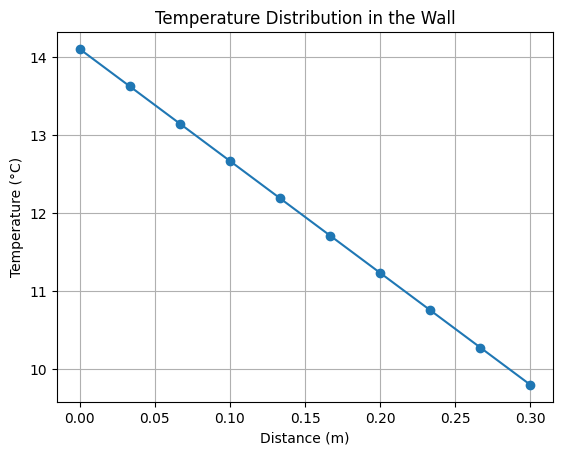

In [11]:
# Λύση της άσκησης 2
# - Σε αυτό το κελί γράψτε μόνο τις ζητούμενες συναρτήσεις χωρίς print και input.
def myfunction2(k: float, L: float, hin: float, hout: float, n: int) -> np.ndarray:

    a = 0
    b = 9
    c = 0

    Tin = (21 + (a - b) / 2)
    Tout = 8 - c

    dx = L / (n - 1)

    A = np.zeros((n, n))
    b = np.zeros(n)

    for i in range(n):
        if i == 0:
            A[i, i] = k / dx + hin
            A[i, i + 1] = -k / dx
            b[i] = hin * Tin
        elif i == n - 1:
            A[i, i - 1] = -k / dx
            A[i, i] = k / dx + hout
            b[i] = hout * Tout
        else:
            A[i, i - 1] = -k / dx
            A[i, i] = 2 * k / dx
            A[i, i + 1] = -k / dx

    T = np.linalg.solve(A, b)

    return T

# elegxos sunartishs
k = 1
L = 0.3
hin = 6
hout = 8
n = 10

temperatures = myfunction2(k, L, hin, hout, n)

# teleutaio zhtoumeno gia dikia mas katanohsh
import matplotlib.pyplot as plt

x = np.linspace(0, L, n)
plt.plot(x, temperatures, marker='o')
plt.xlabel('Distance (m)')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Distribution in the Wall')
plt.grid(True)
plt.show()


In [12]:
# Πρόχειρο άσκησης 2
# - Σε αυτό το κελί μπορείτε να τυπώσετε μεταβλητές και να κάνετε γραφικές παραστάσεις για επαλήθευση. Δεν λαμβάνεται υπόψη στην βαθμολόγηση.

print(myfunction2(1.0, 0.3, 6., 8.,10))

[14.1056338  13.62676056 13.14788732 12.66901408 12.19014085 11.71126761
 11.23239437 10.75352113 10.27464789  9.79577465]


## Άσκηση 3
Γράψτε μια συνάρτηση `myfunction3` που επιλύει το γραμμικό σύστημα:

$$
\begin{bmatrix}
3 & -1 & -2\\
2 & 5 & -3\\
3 & -2 & 5
\end{bmatrix}
\cdot
\begin{bmatrix} x_1\\ x_2\\ x_3 \end{bmatrix}
=
\begin{bmatrix} a+1\\ b+2\\ c+3 \end{bmatrix}
$$
όπου a,b,c τα 3 τελευταία ψηφία του αριθμού μητρώου σας (c=τελευταίο).

Χρησιμοποιήστε την μέθοδο Gauss-Seidel σταματώντας όταν όλα τα στοιχεία της καινούργιας εκτίμησης αποκλίνουν από την προηγούμενη λιγότερο από 2ΟE-4 κατά απόλυτη τιμή ή όταν το πλήθος των επαναλήψεων φτάσει τις 100. Η συνάρτηση θα δέχεται ως όρισμα ένα διάνυσμα $x_{init}$ με τις αρχικές τιμές και θα επιστρέφει ένα διάνυσμα 3 στοιχείων $[x_1,x_2,x_3]$ με τα τελικά αποτελέσματα.

Ελέγξτε τα αποτελέσματα της συνάρτησης για $x_{init}=[0.,0.,0.]$ και $x_{init}=[100.,100.,100.]$.

```
Υπόδειξη: Χρησιμοποιήστε .copy(), όταν θέλετε να αντιγράψετε τις τιμές σε διαφορετικό χώρο μνήμης και όχι να δημιουργήσετε ένα δείκτη σε υπάρχοντα πίνακα.
```
```
Ερώτηση για τις εξετάσεις: Ποιο διάνυσμα αρχικών τιμών δινει πιο γρήγορη σύγκλιση και γιατί;
```

In [13]:
# Λύση της άσκησης 3
# - Σε αυτό το κελί γράψτε μόνο τις ζητούμενες συναρτήσεις χωρίς print και input.

def myfunction3(xinit: np.ndarray) -> np.ndarray:

    a = 0
    b = 9
    c = 0

    A = np.array([[3, 2, 3],
                  [-1, 5, -2],
                  [-2, -3, 5]])

    b_vec = np.array([a + 1, b + 2, c + 3])

    xnew = np.zeros(3)
    xold = xinit.copy()
    tolerance = 2e-4
    max_iterations = 100

    for iteration in range(max_iterations):
        xold = xnew.copy()

        xnew[0] = (b_vec[0] - A[0, 1] * xold[1] - A[0, 2] * xold[2]) / A[0, 0]
        xnew[1] = (b_vec[1] - A[1, 0] * xnew[0] - A[1, 2] * xold[2]) / A[1, 1]
        xnew[2] = (b_vec[2] - A[2, 0] * xnew[0] - A[2, 1] * xnew[1]) / A[2, 2]

        if np.all(np.abs(xnew - xold) < tolerance):
            break

    return xnew

xinit1 = np.array([0., 0., 0.])
xinit2 = np.array([100., 100., 100.])

result1 = myfunction3(xinit1)
result2 = myfunction3(xinit2)

In [14]:
# Πρόχειρο άσκησης 3
# - Σε αυτό το κελί μπορείτε να τυπώσετε μεταβλητές και να κάνετε γραφικές παραστάσεις για επαλήθευση. Δεν λαμβάνεται υπόψη στην βαθμολόγηση.

print(myfunction3(np.array([0., 0., 0.])),myfunction3(np.array([100., 100., 100.])))

[-2.16667849  2.18420322  1.04385054] [-2.16667849  2.18420322  1.04385054]
